In [34]:
import numpy as np
import pymc as pm
from pytensor.tensor import TensorVariable

def logp(value: TensorVariable, mu: TensorVariable) -> TensorVariable:
    return -(value - mu)**2

with pm.Model():
    mu = pm.Normal('mu',0,1)
    pm.CustomDist(
        'custom_dist',
        mu,
        logp=logp,
        observed=np.random.randn(100),
    )
    idata = pm.sample(100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 1 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>]],
      dtype=object)

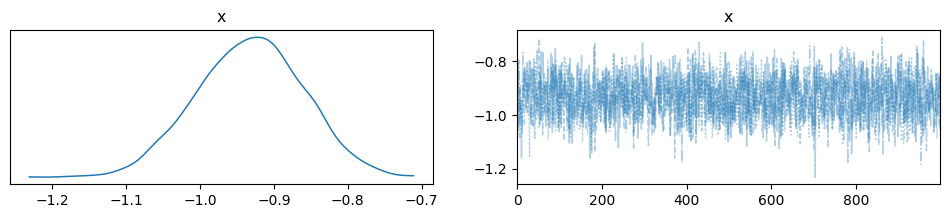

In [94]:
import arviz as az

ax = az.plot_trace(idata, combined=True)
ax

In [48]:
import pytensor

s = 'a'
s_pt = pytensor.shared(s)
s_pt.type
print(dir(s_pt))
print(type(s_pt.get_value()))

d = {'a': 1}
d[s_pt.get_value()]

['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__count__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_test_value__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_default_update', '_index', '_is_protocol', '_owner', 'auto_name', 'clone', 'container', 'default_update', 'eval', 'get_parents', 'get_test_value', 'get_value', 'index', 'name', 'owner', 'set_value', 'tag', 'type']
<class 'str'>


1

In [60]:
from pytensor.tensor import TensorVariable
from pytensor.compile.sharedvalue import SharedVariable
print(dir(TensorVariable))
print(dir(SharedVariable))

['T', '__abs__', '__abstractmethods__', '__add__', '__and__', '__annotations__', '__array_priority__', '__bool__', '__ceil__', '__class__', '__class_getitem__', '__count__', '__delattr__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__dot__', '__eq__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__invert__', '__iter__', '__le__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__orig_bases__', '__parameters__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__rdivmod__', '__rdot__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_test_value__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__weakref__', '__xor__', '

In [84]:
d = 2
a = np.array([0, 1, 2])

class Site:
    def __init__(self, a):
        self.a = a
    def set_a(self, new_a):
        self.a = new_a

vSite = np.vectorize(Site)

init_arry = np.arange(9).reshape((3,3))

lattice = np.empty((3,3), dtype=object)
lattice[:,:] = vSite(init_arry)



def logp(value: TensorVariable, d_pt: TensorVariable, a_pt: TensorVariable, lattice_pt: TensorVariable, x: TensorVariable):
    print(type(x))
    return -(value - a_pt[d_pt] - x) ** 2

with pm.Model() as model:
    x = pm.Normal('x', 0, 1)
    pm.CustomDist(
        'costum',
        d, 
        a,
        lattice,
        x,
        logp=logp,
        observed=np.random.normal(loc=1, size=100)
    )

    idata = pm.sample(1000)

TypeError: Unsupported dtype for TensorType: object

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>]],
      dtype=object)

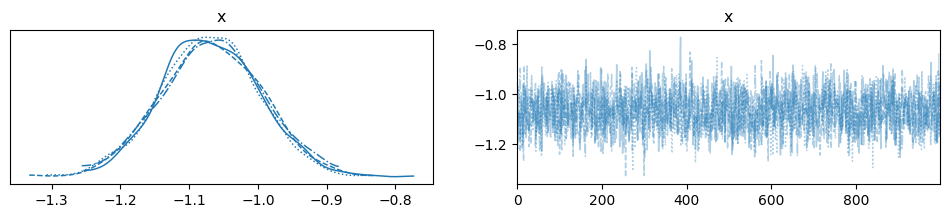

In [76]:
az.plot_trace(idata)

ImportError: cannot import name 'TensorSharedVariable' from 'pytensor.tensor' (/home/ominusliticus/python_venvs/pymc5_venv/lib/python3.10/site-packages/pytensor/tensor/__init__.py)